In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from functools import reduce

In [5]:
import sys

In [6]:
sys.path.append('/Users/jomammahoule1993/Downloads/gps_wind_station-master') # add path where the following python modules live

In [7]:
import load_windgps_data_to_pandas
import process_windgps_data

In [177]:
# where your binary data files are
data_directoryA = '/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data (for reviewers)/RAW wind data/5.2.22/A/0000017/'
#data_directoryB = '/Users/jomammahoule1993/Downloads/20201020_blackrock/B/'
data_directoryB = '/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data (for reviewers)/RAW wind data/5.2.22/B/0000025/'
#data_directoryC = '/Users/jomammahoule1993/Downloads/20201020_blackrock/C/' #no data - recording malfunction
data_directoryD = '/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data (for reviewers)/RAW wind data/5.2.22/D/0000020/'
data_directoryE = '/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data (for reviewers)/RAW wind data/5.2.22/E/0000048/'
data_directoryF = '/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data (for reviewers)/RAW wind data/5.2.22/F/0000019/'
#data_directoryG = '/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data (for reviewers)/RAW wind data/6.7.22_thru_6.8.22/G/0000005/'
data_directoryH = '/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data (for reviewers)/RAW wind data/5.2.22/G/0000023/'
data_directoryI = '/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data (for reviewers)/RAW wind data/5.2.22/I/0000021/'

In [178]:
correct_year = 2022
out = '.' # in this directory

In [179]:
df1 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryA)
df2 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryB)
#df3 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryC)
df4 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryD)
df5 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryE)
df6 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryF)
#df7 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryG)
df8 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryH)
df9 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryI)

Number of data records per block:  110
Number of fill bytes per block:  100


IndexError: list index out of range

In [9]:
alldfs=[df2,df4,df5,df6,df7,df8,df9]

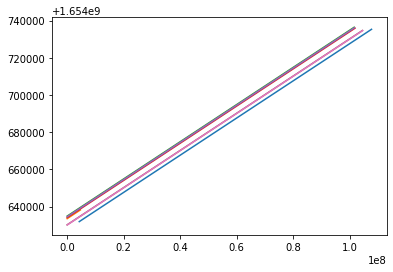

In [10]:
for i in range(0,len(alldfs)):
    alldfs[i] = process_windgps_data.fix_millis_errors(alldfs[i])
    alldfs[i] = process_windgps_data.fix_gps_date(alldfs[i], correct_year=correct_year)
    alldfs[i] = process_windgps_data.calc_interpolated_epoch_time(alldfs[i])
    plt.plot(alldfs[i].millis, alldfs[i].time_epoch)

In [11]:
for i in range(0,len(alldfs)):
    alldfs[i] = process_windgps_data.parse_and_save_several_wind_strings(alldfs[i], wind_strings=['S2', 'D', 'T', 'U', 'V', 'W'])


In [ ]:
#save files as hdfs
names=['SensorA','SensorB','SensorD', 'SensorE', 'SensorF', 'SensorG', 'SensorH', 'SensorI']
for i in range(0,len(alldfs)):
    alldfs[i].to_hdf(names[i] + '_10.20.20', key='/windgps')


In [ ]:
#read in hdfs
df1=pd.read_hdf('SensorA_10.20.20')
df2=pd.read_hdf('SensorB_10.20.20')
df4=pd.read_hdf('SensorD_10.20.20')
df5=pd.read_hdf('SensorE_10.20.20')
df6=pd.read_hdf('SensorF_10.20.20')
df7=pd.read_hdf('SensorG_10.20.20')
df8=pd.read_hdf('SensorH_10.20.20')
df9=pd.read_hdf('SensorI_10.20.20')
df1

In [21]:
alldfs

[            millis        lat         lon  gps_time  gps_date  \
 0          4303510  39.247494 -119.876419    195839     70622   
 1          4303875  39.247494 -119.876419    195839     70622   
 2          4303975  39.247494 -119.876419    195839     70622   
 3          4304075  39.247494 -119.876419    195840     70622   
 4          4304175  39.247494 -119.876419    195840     70622   
 ...            ...        ...         ...       ...       ...   
 1033995  107701042  39.247253 -119.876381      4159     90622   
 1033996  107701142  39.247253 -119.876381      4159     90622   
 1033997  107701242  39.247253 -119.876381      4159     90622   
 1033998  107701342  39.247253 -119.876381      4159     90622   
 1033999  107701442  39.247253 -119.876381      4159     90622   
 
                                                       wind gps_date_str  \
 0        b'\xfcS2  01.262 D  243 U  01.124 V  00.573 W ...       070622   
 1        b'\nS2  01.027 D  221 U  00.668 V  00.780 W 

In [28]:
#ADD suffixes to each DF for all values except time_epoch

#df1=df1.add_suffix('_1')
#df1=df1.rename(columns={"time_epoch_1":"time"})

df2=df2.add_suffix('_2')
df2=df2.rename(columns={"time_epoch_2":"time"})

#df3=df3.add_suffix('_3')
#df3=df3.rename(columns={"time_epoch_3":"time"})

#df4=alldfs[1].add_suffix('_4_verticallyorientated')
#df4=alldfs[1].rename(columns={"time_epoch_4_verticallyorientated":"time"})

df5=df5.add_suffix('_5')
df5=df5.rename(columns={"time_epoch_5":"time"})

df6=df6.add_suffix('_6')
df6=df6.rename(columns={"time_epoch_6":"time"})

df7=df7.add_suffix('_7')
df7=df7.rename(columns={"time_epoch_7":"time"})

df8=df8.add_suffix('_8')
df8=df8.rename(columns={"time_epoch_8":"time"})

df9=df9.add_suffix('_9_verticallyorientated')
df9=df9.rename(columns={"time_epoch_9_verticallyorientated":"time"})

In [111]:
dfs=[df2,df5,df6,df7,df8,df9]

In [30]:
#round all dfs to 1 decimal (their sampling rate)
decimals = 1
for i in range(0,len(alldfs)):
    dfs[i]['time'] = dfs[i]['time'].apply(lambda x: round(x, decimals))


In [112]:
df_merged = reduce(lambda  left, right: pd.merge(left, right,on=['time'],
                                            how='inner'), dfs)

In [113]:
df_merged = df_merged.interpolate()

In [114]:
df_merged

,millis_2,lat_2,lon_2,gps_time_2,gps_date_2,wind_2,gps_date_str_2,year_2,month_2,day_2,...,gps_time_str_9_verticallyorientated,hour_9_verticallyorientated,minute_9_verticallyorientated,second_9_verticallyorientated,S2_9_verticallyorientated,D_9_verticallyorientated,T_9_verticallyorientated,U_9_verticallyorientated,V_9_verticallyorientated,W_9_verticallyorientated
0,7288502,39.247475,-119.876404,204824,70622,b'\nS2 01.302 D 265 U 01.297 V 00.117 W -0...,070622,2022.0,6.0,7.0,...,204732,20,47,32,0.76,94.0,20.78,-0.76,0.05,0.29
1,7288902,39.247475,-119.876404,204824,70622,b'\nS2 01.633 D 269 U 01.633 V 00.040 W -0...,070622,2022.0,6.0,7.0,...,204732,20,47,32,0.62,117.0,20.82,-0.55,0.28,0.10
2,7289002,39.247471,-119.876404,204825,70622,b'\nS2 01.745 D 264 U 01.736 V 00.176 W -0...,070622,2022.0,6.0,7.0,...,204732,20,47,32,0.65,108.0,20.93,-0.62,0.20,0.16
3,7289102,39.247471,-119.876404,204825,70622,b'\nS2 01.616 D 265 U 01.611 V 00.128 W -0...,070622,2022.0,6.0,7.0,...,204732,20,47,32,0.89,86.0,20.80,-0.89,-0.06,0.19
4,7289202,39.247471,-119.876404,204825,70622,b'\nS2 01.619 D 266 U 01.614 V 00.121 W -0...,070622,2022.0,6.0,7.0,...,204732,20,47,32,0.70,96.0,20.89,-0.69,0.07,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997395,107027657,39.248119,-119.876640,3045,90622,b'\nS2 01.685 D 288 U 01.604 V -00.515 W -0...,090622,2022.0,6.0,9.0,...,235421,23,54,21,0.88,145.0,19.92,-0.51,0.72,-0.01
997396,107027757,39.248119,-119.876640,3045,90622,b'\nS2 01.760 D 282 U 01.722 V -00.363 W -0...,090622,2022.0,6.0,9.0,...,235421,23,54,21,1.04,166.0,19.98,-0.25,1.01,-0.01
997397,107027857,39.248119,-119.876640,3045,90622,b'\nS2 01.991 D 281 U 01.952 V -00.392 W -0...,090622,2022.0,6.0,9.0,...,235421,23,54,21,1.30,168.0,20.01,-0.26,1.27,-0.07
997398,107027957,39.248127,-119.876640,3046,90622,b'\nS2 01.981 D 281 U 01.948 V -00.362 W -0...,090622,2022.0,6.0,9.0,...,235421,23,54,21,1.07,164.0,20.01,-0.30,1.03,0.05


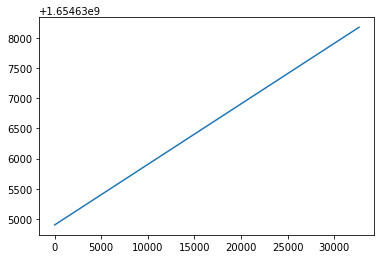

In [34]:
plt.plot(df_merged.time)

In [35]:
dt_wind = np.median(np.diff(df_merged.time.dropna().values))
print('dt Wind: ', dt_wind)

first_time = np.min([df_merged.time])
last_time = np.max([df_merged.time])
print(first_time,last_time)
master_time = np.arange(first_time, last_time, dt_wind)


dt Wind:  0.09999990463256836
1654634904.6 1654638172.6


In [36]:
def latlon_to_xyz(lat,lon):
    """Convert angluar to cartesian coordiantes

    latitude is the 90deg - zenith angle in range [-90;90]
    lonitude is the azimuthal angle in range [-180;180] 
    """
    r = 6371 # https://en.wikipedia.org/wiki/Earth_radius
    theta = math.pi/2 - math.radians(lat) 
    phi = math.radians(lon)
    x = r * math.sin(theta) * math.cos(phi) # bronstein (3.381a)
    y = r * math.sin(theta) * math.sin(phi)
    z = r * math.cos(theta)
    return [x,y,z]

In [47]:
print(df_merged.lat_2.mode(), df_merged.lon_2.mode())
#print(df_merged.lat_3, df_merged.lon_3)
print(df_merged.lat_4_verticallyorientated.mode(), df_merged.lon_4_verticallyorientated.mode())
print(df_merged.lat_5.mode(), df_merged.lon_5.mode())
print(df_merged.lat_6.mode(), df_merged.lon_6.mode())
print(df_merged.lat_7.mode(), df_merged.lon_7.mode())
print(df_merged.lat_8.mode(), df_merged.lon_8.mode())
print(df_merged.lat_9_verticallyorientated.mode(), df_merged.lon_9_verticallyorientated.mode())

0    39.247498
dtype: float32 0   -119.876381
dtype: float32
0    39.247383
dtype: float32 0   -119.876724
dtype: float32
0    39.246689
dtype: float32 0   -119.876495
dtype: float32
0    39.247173
dtype: float32 0   -119.876205
dtype: float32
0    39.24688
dtype: float32 0   -119.876289
dtype: float32
0    39.247993
dtype: float32 0   -119.876579
dtype: float32
0    39.248001
dtype: float32 0   -119.876495
dtype: float32


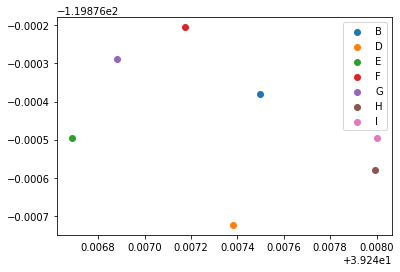

In [83]:
plt.scatter(39.247498, -119.876381, label='B')
plt.scatter(39.247383, -119.876724, label='D')
plt.scatter(39.246689,  -119.876495, label='E')
plt.scatter(39.247173, -119.876205, label='F')
plt.scatter(39.24688, -119.876289, label='G')
plt.scatter(39.247993,  -119.876579, label='H')
plt.scatter( 39.248001,  -119.876495, label='I')
plt.legend(bbox_to_anchor=(1,1))

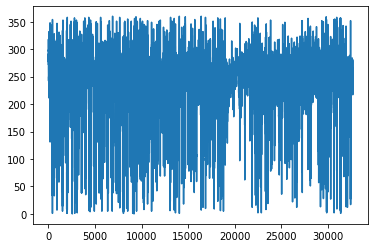

In [86]:
plt.plot(df_merged.D_4_verticallyorientated)

In [87]:
#forest 6/7/22-6/8/22
F3_B=(39.247462, -119.876435)
F3_D=(39.247155, -119.876133)
F3_E=(39.247155, -119.876133)
F3_F=(39.246921, -119.876330)
F3_G=(39.246664, -119.876518)
F3_H=(39.248047,-119.876488)
F3_I=(39.248009, -119.87648)

In [49]:
import math

In [88]:
x,y,z=latlon_to_xyz(39.247155, -119.876133)

In [168]:
day2=df_merged.iloc[655000:-1]

In [169]:
day2=day2.reset_index(inplace=False)
day2=day2.drop(columns='index')

In [93]:
import time

In [116]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(df_merged.time.iloc[184998]))

#time.localtime(df.time.iloc[0]).tm_min

'2022-06-07 18:56:46'

In [136]:
day1.X_2

0        -2457.69647
1        -2457.69647
2        -2457.69647
3        -2457.69647
4        -2457.69647
             ...    
184992   -2457.69647
184993   -2457.69647
184994   -2457.69647
184995   -2457.69647
184996   -2457.69647
Name: X_2, Length: 184997, dtype: float64

In [134]:
dftest.X_2

0        -2457.69647
1        -2457.69647
2        -2457.69647
3        -2457.69647
4        -2457.69647
             ...    
184993   -2457.69647
184994   -2457.69647
184995   -2457.69647
184996   -2457.69647
184997   -2457.69647
Name: X_2, Length: 184998, dtype: float64

In [138]:
pd.set_option('display.max_columns', 1000)

In [144]:
len(day1)

184997

In [163]:
day2.to_hdf('/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data (for reviewers)/6.8.22_all.hdf', key='/windgps')

In [170]:
df=day2.drop(columns={#'lat_1', 'lon_1',
                   'lat_2', 'lon_2',
                   #'lat_3', 'lon_3',
                   # 'lat_4', 'lon_4',
                   #'lat_4_verticallyorientated', 'lon_4_verticallyorientated',
                   'lat_5', 'lon_5',
                   'lat_6', 'lon_6',
                    'lat_7', 'lon_7',
                   #'lat_7_verticallyorientated', 'lon_7_verticallyorientated',
                   'lat_8', 'lon_8',
                   # 'lat_9', 'lon_9',
                   #'lat_8_verticallyorientated', 'lon_8_verticallyorientated',
                   'lat_9_verticallyorientated', 'lon_9_verticallyorientated',
                    })

In [171]:
#df.X_1=df.X_1+2400
df.X_2=df.X_2+2400
#df.X_3=df.X_3+2400
#df.X_4=df.X_4+2400
#df.X_4_verticallyorientated=df.X_4_verticallyorientated+2400
df.X_5=df.X_5+2400
df.X_6=df.X_6+2400
df.X_7=df.X_7+2400
#df.X_7_verticallyorientated=df.X_7_verticallyorientated+2400
df.X_8=df.X_8+2400
#df.X_8_verticallyorientated=df.X_8_verticallyorientated+2400
#df.X_9=df.X_9+2400
df.X_9_verticallyorientated=df.X_9_verticallyorientated+2400

#df.Y_1=df.Y_1+4300
df.Y_2=df.Y_2+4300
#df.Y_3=df.Y_3+4300
#df.Y_4=df.Y_4+4300
#df.Y_4_verticallyorientated=df.Y_4_verticallyorientated+4300
df.Y_5=df.Y_5+4300
df.Y_6=df.Y_6+4300
df.Y_7=df.Y_7+4300
#df.Y_7_verticallyorientated=df.Y_7_verticallyorientated+4300
df.Y_8=df.Y_8+4300
#df.Y_8_verticallyorientated=df.Y_8_verticallyorientated+4300
#df.Y_9=df.Y_9+4300
df.Y_9_verticallyorientated=df.Y_9_verticallyorientated+4300

#df.Z_1=df.Z_1-4000
df.Z_2=df.Z_2-4000
#df.Z_3=df.Z_3-4000
#df.Z_4=df.Z_4-4000
#df.Z_4_verticallyorientated=df.Z_4_verticallyorientated-4000
df.Z_5=df.Z_5-4000
df.Z_6=df.Z_6-4000
df.Z_7=df.Z_7-4000
#df.Z_7_verticallyorientated=df.Z_7_verticallyorientated-4000
df.Z_8=df.Z_8-4000
#df.Z_8_verticallyorientated=df.Z_8_verticallyorientated-4000
#df.Z_9=df.Z_9-4000
df.Z_9_verticallyorientated=df.Z_9_verticallyorientated-4000

In [172]:
#print('A:', df.X_1.iloc[0],df.Y_1.iloc[0],df.Z_1.iloc[0])
print('B:', df.X_2.iloc[0],df.Y_2.iloc[0],df.Z_2.iloc[0])
#print('C:',df.X_3.iloc[0],df.Y_3.iloc[0],df.Z_3.iloc[0])
#print('D:',df.X_4.iloc[0],df.Y_4.iloc[0],df.Z_4.iloc[0])
#print('D:',df.X_4_verticallyorientated.iloc[0],df.Y_4_verticallyorientated.iloc[0],df.Z_4_verticallyorientated.iloc[0])
print('E:',df.X_5.iloc[0],df.Y_5.iloc[0],df.Z_5.iloc[0])
print('F:',df.X_6.iloc[0],df.Y_6.iloc[0],df.Z_6.iloc[0])
print('G:',df.X_7.iloc[0],df.Y_7.iloc[0],df.Z_7.iloc[0])
print('H:',df.X_8.iloc[0],df.Y_8.iloc[0],df.Z_8.iloc[0])
#print('H:',df.X_8_verticallyorientated.iloc[0],df.Y_8_verticallyorientated.iloc[0],df.Z_8_verticallyorientated.iloc[0])
print('I:',df.X_9_verticallyorientated.iloc[0],df.Y_9_verticallyorientated.iloc[0],df.Z_9_verticallyorientated.iloc[0])

B: -57.69646999999986 21.864088999999694 30.74710099999993
E: -57.684678000000076 21.832408000000214 30.720664999999826
F: -57.707588000000214 21.826584000000366 30.700514000000112
G: -57.73063199999979 21.81897200000003 30.67838699999993
H: -57.679927000000134 21.902047999999922 30.797476000000188
I: -57.68066099999987 21.899387000000388 30.79420399999981


In [173]:
df.to_hdf('/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data (for public)/6.8.22_maskedgpsdata.hdf', key='/windgps')

/Volumes/MacBackup/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2434: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['wind_2', 'gps_date_str_2', 'gps_time_str_2', 'wind_5',
       'gps_date_str_5', 'gps_time_str_5', 'wind_6', 'gps_date_str_6',
       'gps_time_str_6', 'wind_7', 'gps_date_str_7', 'gps_time_str_7',
       'wind_8', 'gps_date_str_8', 'gps_time_str_8',
       'wind_9_verticallyorientated', 'gps_date_str_9_verticallyorientated',
       'gps_time_str_9_verticallyorientated'],
      dtype='object')]

  pytables.to_hdf(


In [175]:
df2=df[['time',
        #'S2_1', 'D_1','X_1','Y_1','Z_1',
        'S2_2', 'D_2','X_2','Y_2','Z_2',
        #'S2_3', 'D_3','X_3', 'Y_3','Z_3',
       # 'S2_4_verticallyorientated', 'D_4_verticallyorientated','X_4_verticallyorientated', 'Y_4_verticallyorientated','Z_4_verticallyorientated',
        #'S2_4', 'D_4', 'X_4','Y_4', 'Z_4',
        'S2_5', 'D_5', 'X_5','Y_5', 'Z_5',
        'S2_6',  'D_6', 'X_6','Y_6','Z_6',
        'S2_7',  'D_7', 'X_7','Y_7','Z_7',
        'S2_8', 'D_8','X_8',  'Y_8', 'Z_8',
       # 'S2_9', 'D_9','X_9',  'Y_9', 'Z_9',
       # 'S2_7_verticallyorientated', 'D_7_verticallyorientated','X_7_verticallyorientated',  'Y_7_verticallyorientated', 'Z_7_verticallyorientated',
        'S2_9_verticallyorientated','D_9_verticallyorientated','X_9_verticallyorientated','Y_9_verticallyorientated','Z_9_verticallyorientated',
       #'U_4_verticallyorientated','V_4_verticallyorientated', 
       #'U_8_verticallyorientated','V_8_verticallyorientated', 
       'U_9_verticallyorientated', 'V_9_verticallyorientated',
    
       ]]

In [176]:
df2.to_hdf('/Users/jomammahoule1993/Desktop/hdf_dfs_for_paper/raw data for me/small_6.8.22_maskedgpsdata.hdf', key='/windgps')

In [148]:
len(dftest)

134794

In [160]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(df_merged.time.iloc[655000]))

#time.localtime(df.time.iloc[0]).tm_min

'2022-06-08 08:00:05'

In [ ]:
fnameMerged = 'Merged_10.20.20' + 'windgps_data.hdf'
full_fnameMerged = os.path.join('/Users/Desktop/', fnameMerged)
df_merged.to_hdf(full_fnameMerged, 'windgps')

In [ ]:
dfsmall=df_merged[["time","D_2","D_5","D_6", "D_7", "D_8", "D_9", "S2_2", "S2_5", "S2_6", "S2_7", "S2_8", "S2_9"]]

In [ ]:
fnameSmall = 'SpeedandDirection_10.20.20' + 'windgps_data.hdf'
full_fnameSmall = os.path.join('/Users/Desktop/', fnameSmall)
dfsmall.to_hdf(full_fnameSmall, 'windgps')

In [ ]:
dflatlon=df_merged[["time", "lat_2", "lon_2", "lat_5", "lon_5", "lat_6", "lon_6",  "lat_7", "lon_7", "lat_8", "lon_8", "lat_9", "lon_9"]]

In [ ]:
fnameLatLons = 'LatLons_10.20.20' + 'windgps_data.hdf'
full_fnameLatLons = os.path.join('/Users/Desktop/', fnameLatLons)
dflatlon.to_hdf(full_fnameLatLons, 'windgps')
